## Machine Learning API using FastAPI


## Business Understanding

### Introduction
   #### To create an API that might be requested to interact with a ML model

### Project description

## Data Understanding

1. ID: number to represent patient ID
2. PRG: Plasma glucose
3. PL: Blood Work Result-1 (mu U/ml)
4. PR: Blood Pressure (mm Hg)
5. SK: Blood Work Result-2 (mm)
6. TS: Blood Work Result-3 (mu U/ml)
7. M11: Body mass index (weight in kg/(height in m)^2)
8. BD2: Blood Work Result-4 (mu U/ml)
9. Age: patients age (years)
10. Insurance: If a patient holds a valid insurance card
11. Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

### Hypothesis

1. Null hypothesis: There is no significant difference in the mean Plasma glucose level (PRG) between patients who develop sepsis during their ICU stay and those who do not.

2. Alternative hypothesis: The mean Plasma glucose level (PRG) shows a significant difference between patients who develop sepsis during their ICU stay and those who do not.


### Analytical Questions
1. What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?
2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?
3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?
4. Can Machine Learning models accurately predict the development of sepsis based on the provided variables?
5. What are the most important predictors of sepsis development among the variables examined?
6. How does the presence of valid insurance coverage impact the risk of sepsis among ICU patients?
7. Are there any interactions or nonlinear relationships between the variables and the likelihood of sepsis development?
8. How does the prevalence of sepsis vary across different age groups and insurance statuses?
9. Are there any specific thresholds or cutoff values for variables such as Plasma glucose (PRG) or Body mass index (M11) that are associated with an increased risk of sepsis?
10. How can the insights gained from analyzing these variables be used to improve early detection and prevention strategies for sepsis in ICU settings?

## Import Libraries

In [16]:
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
 
import joblib
import os
 
#Data visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
 

In [72]:
# Preprocessing
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from scipy import stats
from sklearn.linear_model import LogisticRegression


## DATA UNDERSTANDING

In [18]:
df_Patients_Files_Train= pd.read_csv('Dataset/Paitients_Files_Train.csv')
# Display the first few rows of the DataFrame
df_Patients_Files_Train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [19]:
df_Patients_Files_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [20]:
df_Patients_Files_Train.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [21]:
df_Patients_Files_Train.duplicated().sum()


0

In [22]:
df_Patients_Files_Test= pd.read_csv('Dataset/Paitients_Files_Test.csv')
# Display the first few rows of the DataFrame
df_Patients_Files_Test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


# EXPLORATORY DATA ANALYSIS(EDA)

### UNIVARIATE ANALYSIS

In [23]:
sep_df= df_Patients_Files_Train['Sepssis'].value_counts()
sep_df

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

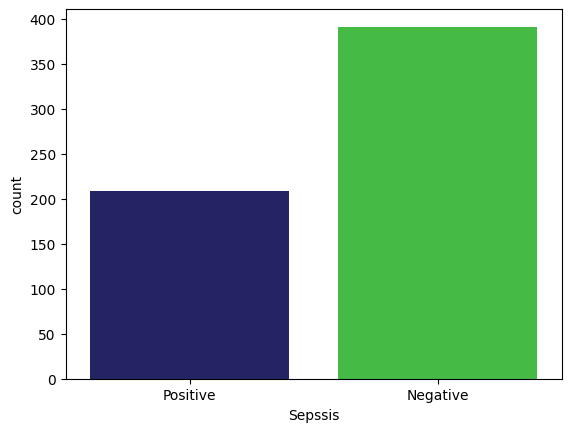

In [25]:
data= df_Patients_Files_Train 
sns.countplot(data=df_Patients_Files_Train, x='Sepssis', palette=['midnightblue', 'limegreen'])
plt.show()

### BIVARIATE ANALYSIS

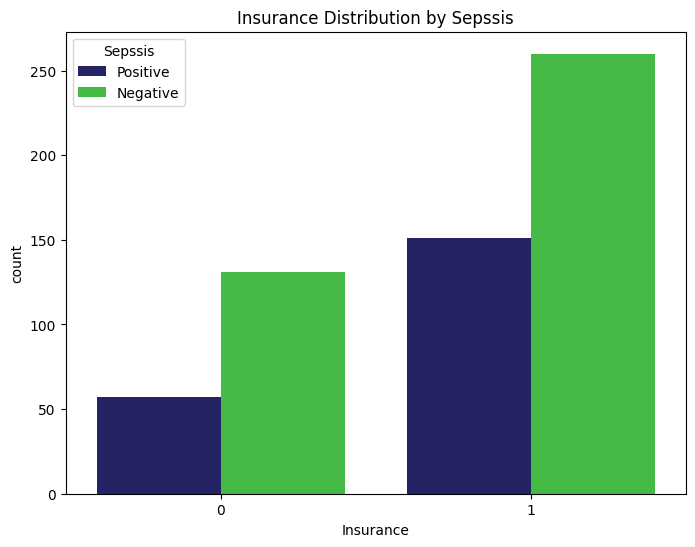

In [31]:
# Analysis for insurance column in relation to sepsis column
plt.figure(figsize=(8, 6))
sns.countplot(data=df_Patients_Files_Train, x='Insurance', hue='Sepssis' ,palette=['midnightblue', 'limegreen'])
plt.title('Insurance Distribution by Sepssis')
plt.show()


### MULTIVARIATE ANALYSIS

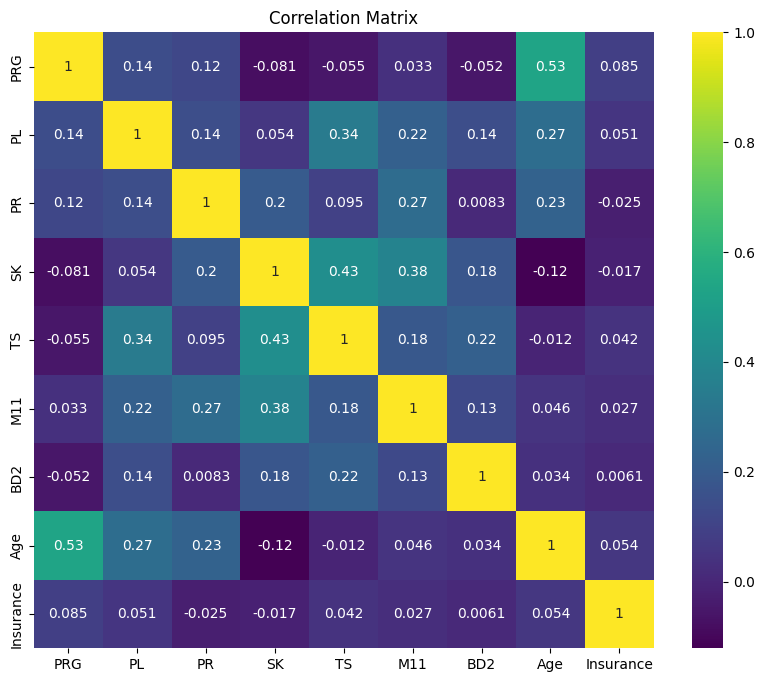

In [32]:
df_corr =df_Patients_Files_Train.corr(numeric_only=True)
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=df_corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

### ANALYTICAL QUESTIONS ANSWERS

What is the average Plasma glucose level (PRG) among patients who develop sepsis compared to those who do not?

In [35]:
average_prg_sepsis = data[data['Sepssis'] == 'Positive']['PRG'].mean()

# Calculate the average PRG for patients who did not develop sepsis
average_prg_no_sepsis = data[data['Sepssis'] == 'Negative']['PRG'].mean()

print("Average PRG among patients who developed sepsis:", average_prg_sepsis)
print("Average PRG among patients who did not develop sepsis:", average_prg_no_sepsis)

Average PRG among patients who developed sepsis: 4.778846153846154
Average PRG among patients who did not develop sepsis: 3.317135549872123


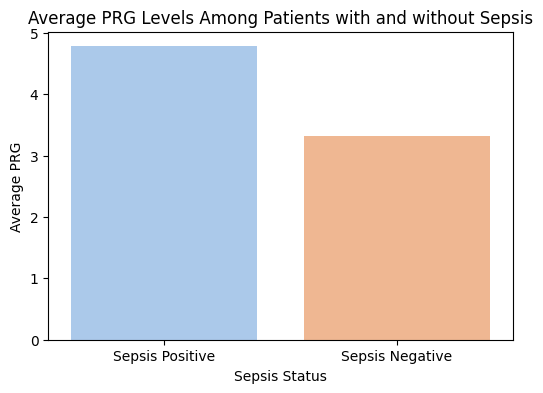

In [40]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Sepsis Positive', 'Sepsis Negative'], y=[average_prg_sepsis, average_prg_no_sepsis], palette='pastel')
plt.title('Average PRG Levels Among Patients with and without Sepsis')
plt.xlabel('Sepsis Status')
plt.ylabel('Average PRG')
plt.show()

2. Are there any significant differences in Blood Pressure (PR), Body mass index (M11), or age between patients who develop sepsis and those who do not?

In [43]:
sepsis_positive = data[data['Sepssis'] == 'Positive']
sepsis_negative = data[data['Sepssis'] == 'Negative']


blood_pressure_pvalue = stats.ttest_ind(sepsis_positive['PR'], sepsis_negative['PR']).pvalue
bmi_pvalue = stats.ttest_ind(sepsis_positive['M11'], sepsis_negative['M11']).pvalue
age_pvalue = stats.ttest_ind(sepsis_positive['Age'], sepsis_negative['Age']).pvalue

# Print p-values to determine significance
print("Blood Pressure (PR) p-value:", blood_pressure_pvalue)
print("Body mass index (M11) p-value:", bmi_pvalue)
print("Age p-value:", age_pvalue)

Blood Pressure (PR) p-value: 0.1353505282559576
Body mass index (M11) p-value: 2.3972519626645312e-15
Age p-value: 2.0718778891881853e-07


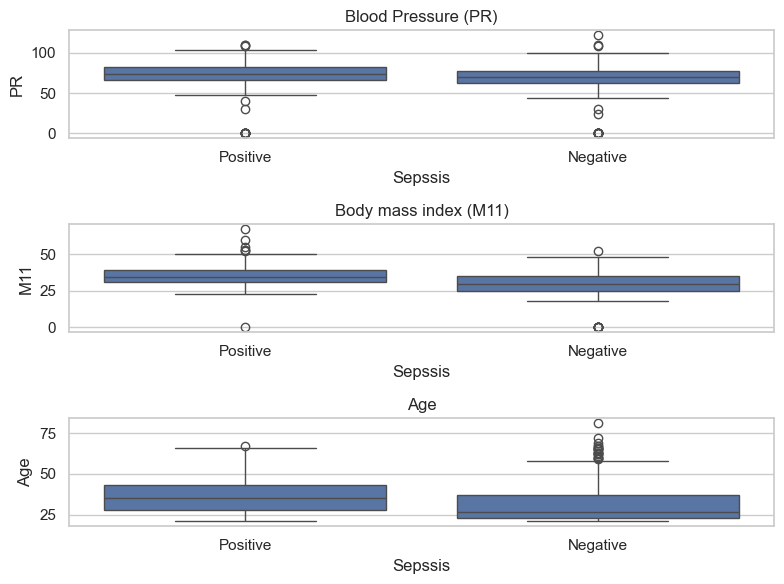

In [48]:
sns.set(style="whitegrid")

# Create subplots for each variable
fig, axes = plt.subplots(3, 1, figsize=(8, 6))

# Blood Pressure (PR) box plot
sns.boxplot(x='Sepssis', y='PR', data=data, ax=axes[0])
axes[0].set_title('Blood Pressure (PR)')

# Body mass index (M11) box plot
sns.boxplot(x='Sepssis', y='M11', data=data, ax=axes[1])
axes[1].set_title('Body mass index (M11)')

# Age box plot
sns.boxplot(x='Sepssis', y='Age', data=data, ax=axes[2])
axes[2].set_title('Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

3. Is there a correlation between insurance status and the likelihood of developing sepsis during an ICU stay?

In [71]:
# Convert 'Sepsis' column to numeric format (assuming it contains binary values)
data['Sepssis'] = data['Sepssis'].map({'Positive': 1, 'Negative': 0})

insurance_status_numeric = pd.to_numeric(data['Insurance'])

# Calculate correlation coefficient between insurance status and sepsis
correlation = np.corrcoef(insurance_status_numeric, data['Sepssis'])[0, 1]

# Print the correlation coefficient
print("Correlation between insurance status and likelihood of developing sepsis:", correlation)

Correlation between insurance status and likelihood of developing sepsis: nan


How does the presence of valid insurance coverage impact the risk of sepsis among ICU patients?

### HYPOTHESIS TESTING

In [77]:
# Separate data for patients with and without sepsis
prg_sepsis = data[data['Sepssis'] == 'Positive']['PRG']
prg_no_sepsis = data[data['Sepssis'] == 'Negative']['PRG']

# Perform independent samples t-test
t_stat, p_value = ttest_ind(prg_sepsis, prg_no_sepsis)

# Define significance level
alpha = 0.05

# Print results
print("Independent Samples t-test Results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis: The mean PRG differs significantly between patients with and without sepsis.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean PRG between patients with and without sepsis.")

Independent Samples t-test Results:
t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no significant difference in the mean PRG between patients with and without sepsis.
